# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Pantaree Prapanirin (Plerm) 6113081
Wanvarang Marrat (or) 6113089
Sirinda Ketchattrariyakul (SaiParn) 6113167


## 1. Load coronavirus file from `dataset/2019_nCoV_data.csv`

In [4]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [5]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [12]:
fileName = '2019_nCoV_data.csv'
df = pd.read_csv(dp(fileName), encoding = 'utf-8')

## 2. Show dataframe

In [13]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
765,766,02/04/2020 22:00:00,"Boston, MA",US,2020-01-02 19:43:00,1.0,0.0,0.0
766,767,02/04/2020 22:00:00,"Los Angeles, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
767,768,02/04/2020 22:00:00,"Orange, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
768,769,02/04/2020 22:00:00,"Seattle, WA",US,2020-01-02 19:43:00,1.0,0.0,0.0


## 3. Show how many countries that affected by virus

In [21]:
count_country = df.groupby(['Country']).size().reset_index(name='counts')
print('country affected covid:',len(count_country))
count_country

country affected covid: 32


,Country,counts
0,Australia,32
1,Belgium,1
2,Brazil,1
3,Cambodia,9
4,Canada,20
5,China,34
6,Finland,7
7,France,12
8,Germany,9
9,Hong Kong,13


In [29]:
 df.drop('Sno', axis=1).groupby(['Country']).sum()

,Confirmed,Deaths,Recovered
Country,,,
Australia,92.0,0.0,12.0
Belgium,1.0,0.0,0.0
Brazil,0.0,0.0,0.0
Cambodia,9.0,0.0,0.0
Canada,29.0,0.0,0.0
China,549.0,0.0,0.0
Finland,7.0,0.0,0.0
France,55.0,0.0,0.0
Germany,62.0,0.0,0.0


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries

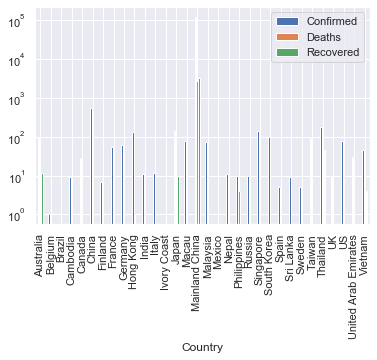

In [37]:
dfbar=df.drop('Sno', axis=1).groupby(['Country']).sum()
dfbar
dfbar.plot(kind='bar', logy = True)

## 5. Show and visualize global spread of the coronavirus over time 

In [55]:
count_date = df.drop('Sno', axis=1).groupby(['Date']).sum()
count_date


,Confirmed,Deaths,Recovered
Date,,,
01/22/2020 12:00:00,555.0,0.0,0.0
01/23/2020 12:00:00,653.0,18.0,30.0
01/24/2020 12:00:00,941.0,26.0,36.0
01/25/2020 22:00:00,2019.0,56.0,49.0
01/26/2020 23:00:00,2794.0,80.0,54.0
01/27/2020 20:30:00,4473.0,107.0,63.0
01/28/2020 23:00:00,6057.0,132.0,110.0
01/29/2020 21:00:00,7783.0,170.0,133.0
01/30/2020 21:30:00,9776.0,213.0,187.0


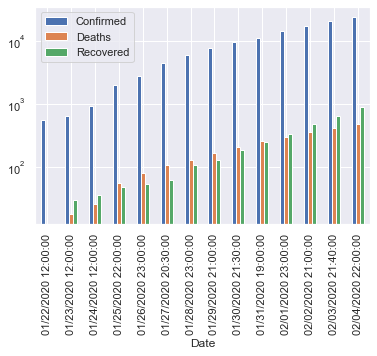

In [58]:
count_date.plot(kind='bar', logy = True)

## 6. Show dependence between confirmed cases and deaths case

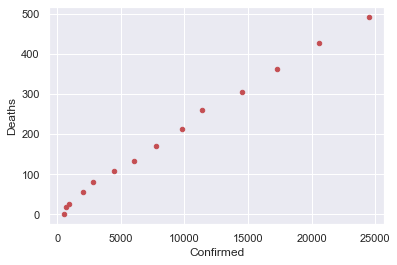

In [60]:
count_date.plot(kind='scatter', x = 'Confirmed', y = 'Deaths', c='r')


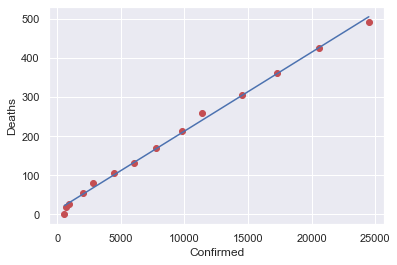

In [76]:
slope, intercept, r_value, p_value, std_err = stats.linregress(count_date['Confirmed'] , count_date['Deaths'])
intercept,slope

def linefitline(b):
    return intercept + slope *b

line = linefitline(count_date['Confirmed'])
plt.scatter(count_date['Confirmed'] , count_date['Deaths'] , c='r')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.plot(count_date['Confirmed'], line, c= 'b')
plt.show()

## 7. Show dependence between confirmed cases and recovered case